<a href="https://colab.research.google.com/github/DinaTTomoum/Thesis2021/blob/main/Tweets%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib



In [ ]:
!pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
  help                        Show help for commands.

General Options:
  -h, --help
  Show help.
  --isola

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
# Import re is regular expressions
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
from nltk.corpus import stopwords
import spacy
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving 2016 US Elections TRUMP.csv to 2016 US Elections TRUMP.csv


In [4]:
df = pd.read_csv('2016 US Elections TRUMP.csv')

In [5]:
df.head()

,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,Retweets,Favorites,place_full_name,place_name,place_country,source_url
0,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,False,NaN,2016-09-27T22:13:24,NaN,NaN,NaN,False,en,2181,6172,NaN,NaN,NaN,http://twitter.com/download/iphone
1,realDonaldTrump,"Once again, we will have a government of, by a...",False,NaN,2016-09-27T21:08:22,NaN,NaN,NaN,False,en,4132,11239,NaN,NaN,NaN,http://twitter.com/download/iphone
2,realDonaldTrump,"On National #VoterRegistrationDay, make sure y...",True,GOP,2016-09-27T20:31:14,NaN,NaN,NaN,False,en,2953,6963,NaN,NaN,NaN,http://twitter.com/download/iphone
3,realDonaldTrump,Hillary Clinton's Campaign Continues To Make F...,False,NaN,2016-09-27T20:14:33,NaN,NaN,NaN,False,en,3833,9840,NaN,NaN,NaN,http://twitter.com/download/iphone
4,realDonaldTrump,"'CNBC, Time magazine online polls say Donald T...",False,NaN,2016-09-27T20:06:25,NaN,NaN,NaN,False,en,4236,10948,NaN,NaN,NaN,http://twitter.com/download/iphone


In [6]:
#rename column text to tweets
df_tidy = df.rename(columns = {'text': 'Tweets'}, inplace = False)
df_tidy.head()

,handle,Tweets,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,Retweets,Favorites,place_full_name,place_name,place_country,source_url
0,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,False,NaN,2016-09-27T22:13:24,NaN,NaN,NaN,False,en,2181,6172,NaN,NaN,NaN,http://twitter.com/download/iphone
1,realDonaldTrump,"Once again, we will have a government of, by a...",False,NaN,2016-09-27T21:08:22,NaN,NaN,NaN,False,en,4132,11239,NaN,NaN,NaN,http://twitter.com/download/iphone
2,realDonaldTrump,"On National #VoterRegistrationDay, make sure y...",True,GOP,2016-09-27T20:31:14,NaN,NaN,NaN,False,en,2953,6963,NaN,NaN,NaN,http://twitter.com/download/iphone
3,realDonaldTrump,Hillary Clinton's Campaign Continues To Make F...,False,NaN,2016-09-27T20:14:33,NaN,NaN,NaN,False,en,3833,9840,NaN,NaN,NaN,http://twitter.com/download/iphone
4,realDonaldTrump,"'CNBC, Time magazine online polls say Donald T...",False,NaN,2016-09-27T20:06:25,NaN,NaN,NaN,False,en,4236,10948,NaN,NaN,NaN,http://twitter.com/download/iphone


In [7]:
# Clean the text

#create a function to clean the tweets
def cleanTxt(text) :
  text = re.sub('@[^A-Za-z0-9^,!.\/+-=]', '', text) #remove mentions
  text = re.sub(r'#', '', text) #remove the hashtag symbol
  text= re.sub(r'RT[\s]+', '', text) #removing RT (retweets) text 
  text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
  
  return text

df_tidy['Tweets'] = df_tidy['Tweets'].apply(cleanTxt)
 
 #show the cleaned text
df_tidy

,handle,Tweets,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,Retweets,Favorites,place_full_name,place_name,place_country,source_url
0,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,False,NaN,2016-09-27T22:13:24,NaN,NaN,NaN,False,en,2181,6172,NaN,NaN,NaN,http://twitter.com/download/iphone
1,realDonaldTrump,"Once again, we will have a government of, by a...",False,NaN,2016-09-27T21:08:22,NaN,NaN,NaN,False,en,4132,11239,NaN,NaN,NaN,http://twitter.com/download/iphone
2,realDonaldTrump,"On National VoterRegistrationDay, make sure yo...",True,GOP,2016-09-27T20:31:14,NaN,NaN,NaN,False,en,2953,6963,NaN,NaN,NaN,http://twitter.com/download/iphone
3,realDonaldTrump,Hillary Clinton's Campaign Continues To Make F...,False,NaN,2016-09-27T20:14:33,NaN,NaN,NaN,False,en,3833,9840,NaN,NaN,NaN,http://twitter.com/download/iphone
4,realDonaldTrump,"'CNBC, Time magazine online polls say Donald T...",False,NaN,2016-09-27T20:06:25,NaN,NaN,NaN,False,en,4236,10948,NaN,NaN,NaN,http://twitter.com/download/iphone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Faceboo...",False,NaN,2016-01-05T03:47:14,NaN,NaN,NaN,False,en,1110,4024,NaN,NaN,NaN,http://twitter.com/download/android
3214,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell...",False,NaN,2016-01-05T03:44:17,NaN,NaN,NaN,False,en,855,3181,NaN,NaN,NaN,http://twitter.com/download/android
3215,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @r...",False,NaN,2016-01-05T03:42:10,NaN,NaN,NaN,False,en,2315,5992,NaN,NaN,NaN,http://twitter.com/download/android
3216,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack22...",False,NaN,2016-01-05T03:39:11,NaN,NaN,NaN,False,en,1054,3258,NaN,NaN,NaN,http://twitter.com/download/android


In [8]:
#create function to get subjectivity: expresses author's opinions. deal with the detection of “private states” (opinions, emotions, sentiments, beliefs, speculations)
# Each word in the lexicon has scores for:
# 1)     polarity: negative vs. positive    (-1.0 => +1.0)
# 2) subjectivity: objective vs. subjective (+0.0 => +1.0)

def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(text): #polarity tells how postive or negative the text is return 
  return TextBlob(text).sentiment.polarity 

#create two new columns
df_tidy['Subjectivity'] = df_tidy['Tweets'].apply(getSubjectivity) 
df_tidy['Polarity'] = df_tidy['Tweets'].apply(getPolarity)

 #show the cleaned text
df_tidy.head()


,handle,Tweets,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,Retweets,Favorites,place_full_name,place_name,place_country,source_url,Subjectivity,Polarity
0,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,False,NaN,2016-09-27T22:13:24,NaN,NaN,NaN,False,en,2181,6172,NaN,NaN,NaN,http://twitter.com/download/iphone,0.100000,-0.125
1,realDonaldTrump,"Once again, we will have a government of, by a...",False,NaN,2016-09-27T21:08:22,NaN,NaN,NaN,False,en,4132,11239,NaN,NaN,NaN,http://twitter.com/download/iphone,0.000000,0.000
2,realDonaldTrump,"On National VoterRegistrationDay, make sure yo...",True,GOP,2016-09-27T20:31:14,NaN,NaN,NaN,False,en,2953,6963,NaN,NaN,NaN,http://twitter.com/download/iphone,0.888889,0.500
3,realDonaldTrump,Hillary Clinton's Campaign Continues To Make F...,False,NaN,2016-09-27T20:14:33,NaN,NaN,NaN,False,en,3833,9840,NaN,NaN,NaN,http://twitter.com/download/iphone,0.600000,-0.400
4,realDonaldTrump,"'CNBC, Time magazine online polls say Donald T...",False,NaN,2016-09-27T20:06:25,NaN,NaN,NaN,False,en,4236,10948,NaN,NaN,NaN,http://twitter.com/download/iphone,0.333333,0.250


In [11]:
#choose needed columns for wordcloud
df_tidy[["handle","Tweets"]].head()

,handle,Tweets
0,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...
1,realDonaldTrump,"Once again, we will have a government of, by a..."
2,realDonaldTrump,"On National VoterRegistrationDay, make sure yo..."
3,realDonaldTrump,Hillary Clinton's Campaign Continues To Make F...
4,realDonaldTrump,"'CNBC, Time magazine online polls say Donald T..."


In [15]:
#Group by candidate
candidate = df_tidy.groupby("handle")

#summary statistic of candidates
candidate.describe().head()


in_reply_to_status_id                    ... Polarity               
                                count          mean std  ...      50%       75%  max
handle                                                   ...                        
realDonaldTrump                   1.0  7.670000e+17 NaN  ...      0.0  0.366667  1.0

[1 rows x 48 columns]

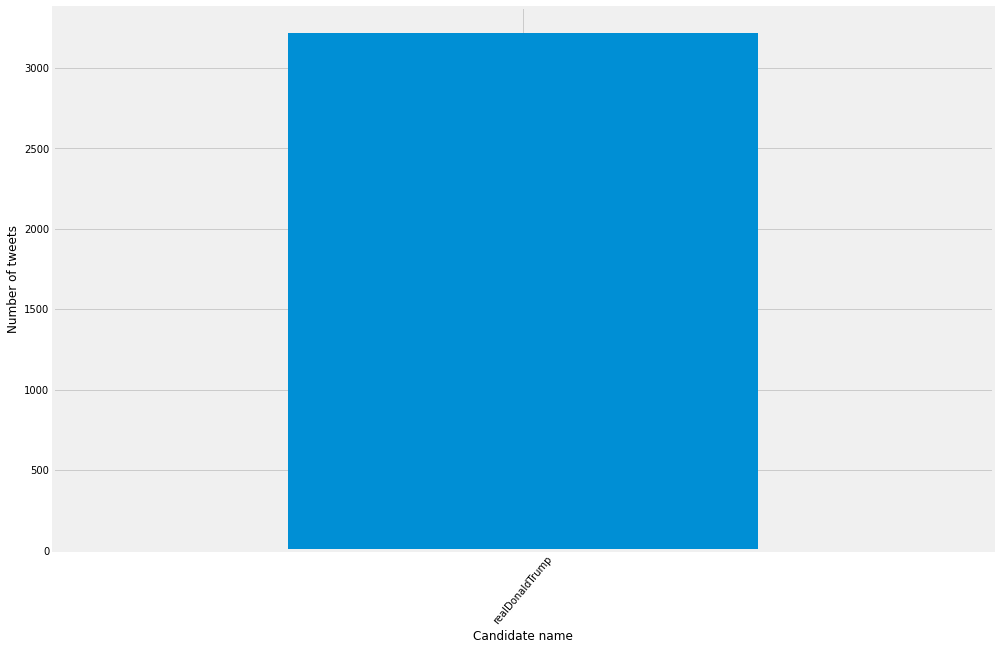

In [16]:
#You can plot using the plot method of Pandas DataFrame and Matplotlib
plt.figure(figsize=(15,10))
candidate.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Candidate name")
plt.ylabel("Number of tweets")
plt.show()

#this plot shows that Clinton and Trump nearly tweeted the same number of times during this period

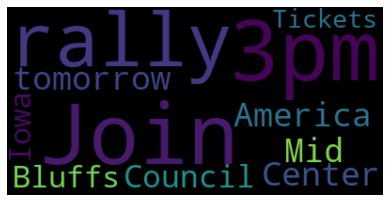

In [18]:
#set up wordcloud
?WordCloud

mixedtweets = df_tidy.Tweets[0]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(mixedtweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

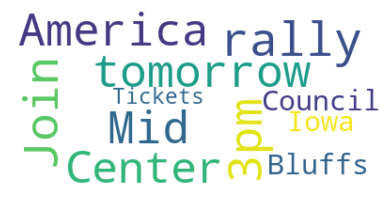

In [19]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(mixedtweets)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [20]:
mixedtweets = " ".join(review for review in df_tidy.Tweets)
print ("There are {} words in the combination of all review.".format(len(mixedtweets)))

There are 332637 words in the combination of all review.


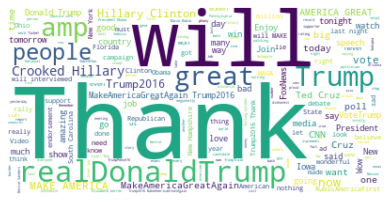

In [21]:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(mixedtweets)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()